In [ ]:
import pandas as pd
hw = pd.read_excel("HeightWeight.xlsx")
hw.head()

,Height,Weight
0,69,153
1,74,175
2,68,155
3,70,135
4,72,172


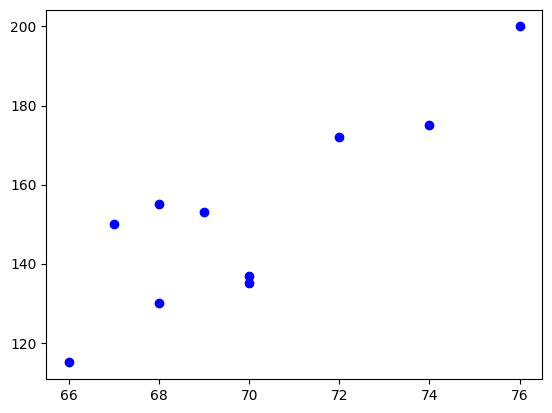

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x=np.array(hw['Height'])
y=np.array(hw['Weight'])
plt.scatter(x, y, c="blue")

In [ ]:
plt.show()

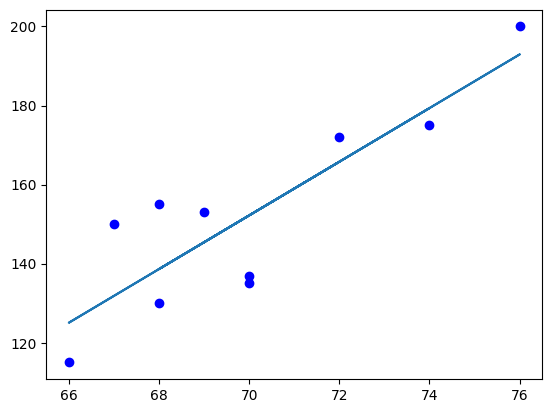

In [ ]:
#Fitting linear polynomial
[m,c]=np.polyfit(x=x,y=y,deg=1)
plt.plot(x,m*x+c)
plt.scatter(x, y, c="blue")

In [ ]:
#Finding mean vector
x=np.array([x,y]).transpose()
n=len(x)
ones=np.ones(n)
meanVec= 1/n*x.transpose().dot(ones)
print(meanVec)

[ 70.  152.2]


Note:

say there's x= [ 1 2 3 4 5 \n
                6 7 8 9 10 ]
            ones = [ 1\n
                     1]
           (1/n)*x^t gives (x1+x2.....xn)/n resulting in mean of x in meanVec[0]
            

In [ ]:
v1= np.array([1,2])
v2= np.array([2,3])
np.outer(v1,v2)

array([[2, 3],
       [4, 6]])

Note:

Product of two vectors (np.outer)
i.e [1\n 2] and [2 3]

In [ ]:
#Finding sample
y = x - np.outer(ones,meanVec)
covMat = 1/(n-1)*y.transpose().dot(y)
print(covMat)

[[ 10.          67.88888889]
 [ 67.88888889 623.73333333]]


In [ ]:
#Finding the correlation matrix
stddevs = 1/np.sqrt(np.diag(covMat))
D= np.diag(stddevs)
#D is the D^(-1)
corrMatR = D.dot(covMat).dot(D)
print(corrMatR)

[[1.         0.85960558]
 [0.85960558 1.        ]]


1 inch = 0.0254m and  1 lbs = 0.4536 kg

In [ ]:
#Transforming the data
new_hw= pd.DataFrame({"new_ht": 0.0254 *hw['Height'],
                      "new_wt":0.4536*hw['Weight']})
new_hw.head()

,new_ht,new_wt
0,1.7526,69.4008
1,1.8796,79.3800
2,1.7272,70.3080
3,1.7780,61.2360
4,1.8288,78.0192


In [ ]:
x= np.array(new_hw['new_ht'])
y= np.array(new_hw['new_wt'])
X= np.array([x,y]).transpose()
n=len(X)
ones=np.ones(n)
new_meanVec= 1/n*x.transpose().dot(ones)
Y = X - np.outer(ones,new_meanVec)
new_covMat = 1/(n-1)*Y.transpose().dot(Y)
print(new_covMat)

[[6.45160000e-03 7.82177760e-01]
 [7.82177760e-01 5.15488702e+03]]


In [ ]:
import pandas as pd
jd = pd.read_csv("3judges.csv")
jd.head()

,J1,J2,J3
0,7,7,7
1,6,7,7
2,5,6,4
3,6,7,6
4,7,8,7


In [ ]:
#1)
judge_means = jd.mean(axis=0)
print(judge_means)
highest_scoring_judge = judge_means.idxmax()
print("Judge who gives higher scores: ", highest_scoring_judge)

J1     6.000000
 J2    7.000000
J3     5.777778
dtype: float64
Judge who gives higher scores:   J2


In [ ]:
#2)
contestant_sum = jd.sum(axis=1)
print("Average of contestants:\n",contestant_sum)
contestant_means = jd.mean(axis=1)
print("Average of contestants:\n",contestant_means)

Average of contestants:
 0    21
1    20
2    15
3    19
4    22
5    22
6    16
7    19
8    15
dtype: int64
Average of contestants:
 0    7.000000
1    6.666667
2    5.000000
3    6.333333
4    7.333333
5    7.333333
6    5.333333
7    6.333333
8    5.000000
dtype: float64


In [ ]:
#3)
jd['J1']=0.5*jd['J1']
jd['J2']=1.25*jd['J2']
jd['J3']=1.25*jd['J3']
contestant_newscheme= jd.sum(axis=1)
contestant_newscheme

0    23.6250
1    23.3750
2    16.8750
3    21.8125
4    25.1875
5    25.1875
6    18.4375
7    21.8125
8    16.8750
dtype: float64

In [ ]:
#4)After protest
jd['J1']=0.5*jd['J1']
jd['J2']=1.0*jd['J2']
jd['J3']=1.0*jd['J3']
contestant_newscheme= jd.sum(axis=1)
contestant_newscheme

0    22.7500
1    22.6250
2    16.2500
3    21.0625
4    24.3125
5    24.3125
6    17.8125
7    21.0625
8    16.2500
dtype: float64